In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('muted')
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
data = pd.read_csv('data/medicare_data_disease.csv')
diseases = pd.read_csv('data/drug-disease_keys.csv')

In [13]:
spending = data.groupby('Indication').sum().sort_values(by='Total Spending', ascending=False)
spending_drug = data.groupby('Brand Name').sum().sort_values(by='Total Spending', ascending=False)

In [ ]:
plt.figure(figsize=(6,12))
g = sns.barplot(x='Total Spending', y='Indication', data=spending.reset_index()[:50], estimator=np.sum)
g.set(yticklabels=[i[:30] for i in spending[:100].index])
plt.title('Top 50 indications by Total Spending (USD) Sum from 2011 to 2015')
plt.savefig('Top_50_indications_spending.png', dpi=300, bbox_inches='tight')

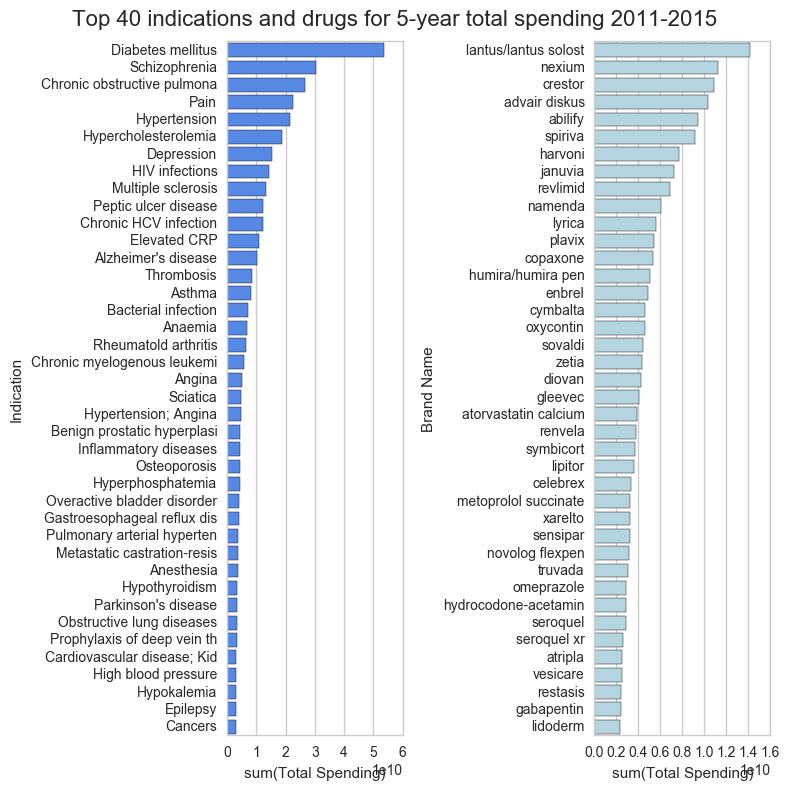

In [50]:
n_top = 40
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(8,8))
g = sns.barplot(x='Total Spending', y='Indication', data=spending.reset_index()[:n_top], estimator=np.sum, ax=ax1, 
                color=sns.xkcd_rgb['dodger blue'])
g.set(yticklabels=[i[:27] for i in spending[:n_top].index])
g2 = sns.barplot(x='Total Spending', y='Brand Name', data=spending_drug.reset_index()[:n_top], estimator=np.sum, ax=ax2,
                 color='lightblue')
g2.set(yticklabels=[i[:20] for i in spending_drug[:n_top].index])
#plt.title('Top 50 indications by Beneficiary Count Sum from 2011 to 2015')
fig.suptitle('Top %s indications and drugs for 5-year total spending 2011-2015' %n_top, size=16)
plt.tight_layout()
fig.subplots_adjust(top=0.94)
plt.savefig('Top_%s_disease_drug.png' %n_top, dpi=300, bbox_inches='tight')

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(8,12))
g = sns.barplot(x='Total Spending', y='Indication', data=spending.reset_index()[:50], estimator=np.sum, ax=ax1)
g.set(yticklabels=[i[:30] for i in spending[:100].index])
plt.title('Top 50 indications by Total Spending (USD) Sum from 2011 to 2015')
g2 = sns.barplot(x='Beneficiary Count', y='Indication', data=spending.reset_index()[:50], estimator=np.sum, ax=ax2)
g2.set(yticklabels=[i[:30] for i in spending[:100].index])
plt.title('Top 50 indications by Beneficiary Count Sum from 2011 to 2015')

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(x=spending['Total Spending'][:100], 
            y=spending['Beneficiary Count'][:100],
            s=spending['Claim Count'][:100]/1000000,
            #cmap=data.groupby('Indication').sum()[:100].reset_index()['Indication'],
            alpha=0.5)
plt.title('Top 100 Indications by Total Spending (USD) Sum from 2011 to 2015')
plt.xlabel('Total Spending 2011-2015')
plt.ylabel('Beneficiary Count')
#plt.legend()
plt.savefig('Top_100_indications_bubbles.png', dpi=300, bbox_inches='tight')

In [ ]:
sns.swarmplot(x='Indication', y='Total Spending', 
              data=data[data['Year']==2015].sort_values(by='Total Spending', ascending=False)[:1000])

In [ ]:
sns.factorplot(x='Year', y='Total Spending', data=data)

In [ ]:
top_10_spend = data[data['Year']==2015].sort_values(by='Total Spending', ascending=False)[['Brand Name', 'Total Spending', 'Year']][:13]
top_10_spend

In [ ]:
sns.factorplot(x='Year', y='Total Spending', hue='Brand Name', data=data[data['Brand Name'].isin(top_10_spend['Brand Name'])])
plt.title('Top total spending drugs in 2015')
plt.savefig('top_10_drugs.png', dpi=300, bbox_inches='tight')

In [ ]:
sns.jointplot(x='Beneficiary Count', y='Total Spending',
              data=data[data['Year']==2015])#[data['Brand Name'].isin(top_10_spend['Brand Name'])])

In [ ]:
sns.factorplot(x='Year', y='Total Spending', hue='Brand Name', data=data[data['Brand Name'].isin(['TRUVADA ', 'ZOVIRAX ', 'TYSABRI '])])

In [ ]:
sns.factorplot(x='Year', y='Beneficiary Count', hue='Brand Name', data=data[data['Brand Name'].isin(['TRUVADA ', 'ZOVIRAX ', 'TYSABRI ', 'HARVONI '])])